# Titanic Data Analysis

In [33]:
# Import required libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [34]:
# Load titanic dataset from seaborn 
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
print(df.shape)
print(df.isnull().sum())
print(df.describe())

(891, 16)
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
family_size      0
dtype: int64
         survived      pclass         age       sibsp       parch        fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000   
max      1.000000    3.00

In [66]:
# Data Cleaning
df['age'] = df['age'].fillna(df['age'].mean())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# total passengers 
print("Total Passengers : ",len(df))
print("Survivors Count :\n",df['survived'].value_counts())
print("Male vs Female Survivle Rate:\n",df.groupby('sex')['survived'].mean())

Total Passengers :  891
Survivors Count :
 survived
0    549
1    342
Name: count, dtype: int64
Male vs Female Survivle Rate:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


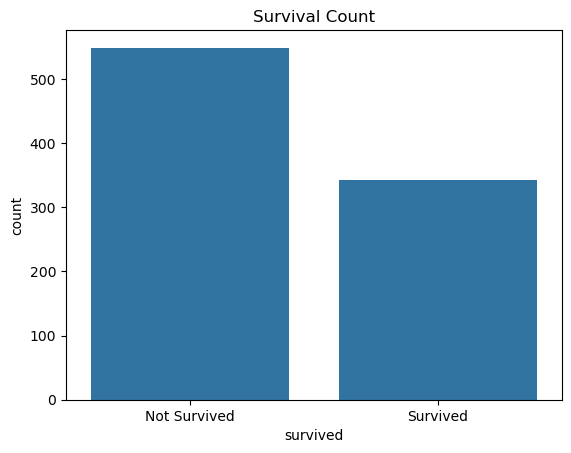

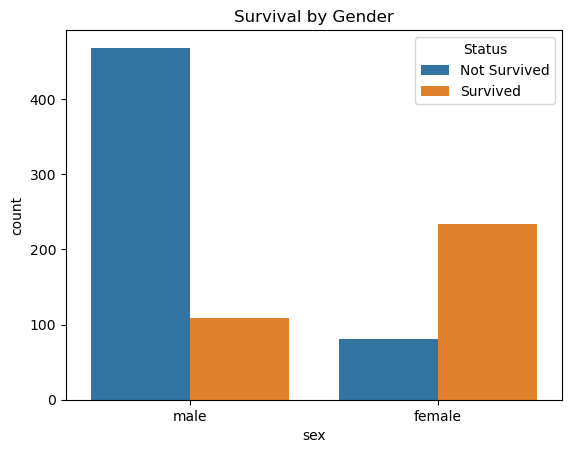

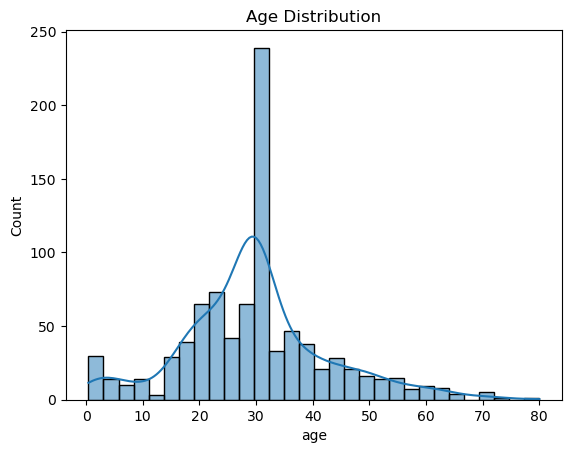

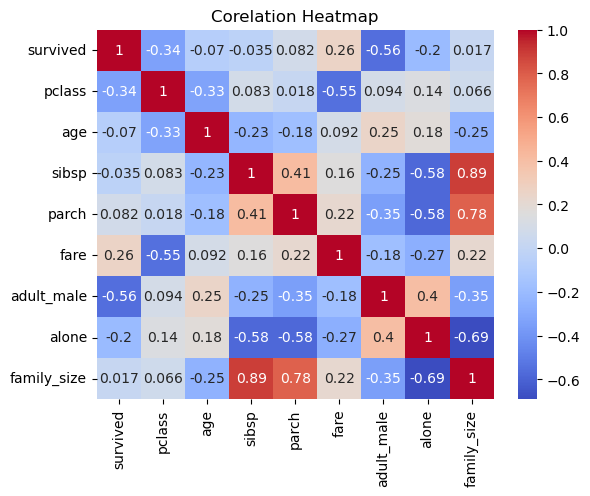

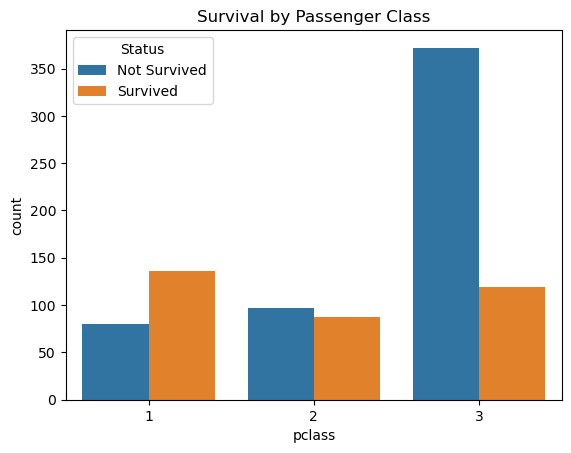

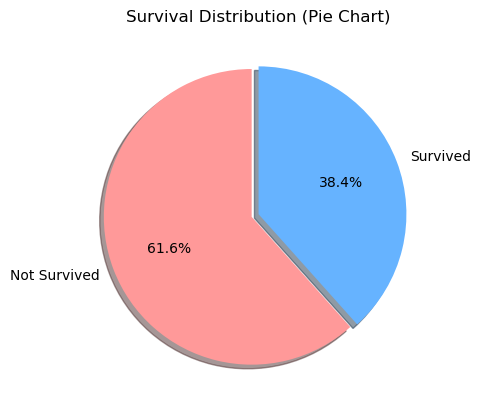

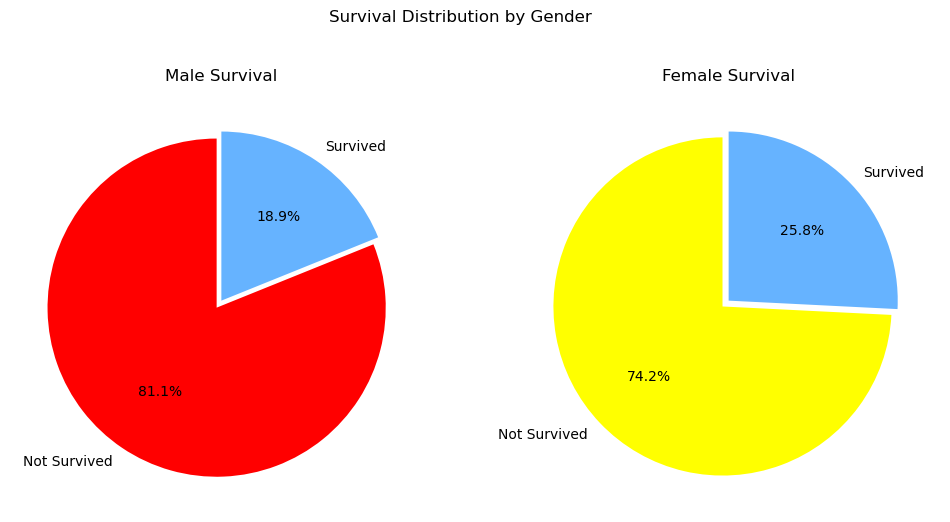

In [79]:
# survival count 
sns.countplot(x='survived',data=df)
plt.title("Survival Count")
plt.xticks([0,1],["Not Survived","Survived"])
plt.show()

# Survival by gender

sns.countplot(x='sex',hue='survived',data= df)
plt.title("Survival by Gender")
plt.legend(title="Status",labels=["Not Survived","Survived"])
plt.show()

#Age distribution
sns.histplot(df['age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Corelation Heatmap")
plt.show()

sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.legend(title="Status",labels=["Not Survived","Survived"])
plt.show()

# Survival Pie Chart
survival_counts = df['survived'].value_counts()

labels = ["Not Survived", "Survived"]
colors = ["#ff9999","#66b3ff"]

plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=(0.05,0))  

plt.title("Survival Distribution (Pie Chart)")
plt.show()


# Gender-wise Survival Pie Chart
male_counts = df[df['sex']=="male"]['survived'].value_counts()
female_counts = df[df['sex']=="female"]['survived'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].pie(male_counts, labels=["Not Survived", "Survived"], autopct='%1.1f%%',
          startangle=90, colors=["red","#66b3ff"], explode=(0.05,0))
ax[0].set_title("Male Survival")

ax[1].pie(female_counts, labels=["Not Survived", "Survived"], autopct='%1.1f%%',
          startangle=90, colors=["yellow","#66b3ff"], explode=(0.05,0))
ax[1].set_title("Female Survival")

plt.suptitle("Survival Distribution by Gender")
plt.show()
